In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree


from sklearn.model_selection import GridSearchCV

import graphviz
#!conda install --yes python-graphviz
#!conda install --yes graphviz

import matplotlib.pyplot as plt

In [2]:
! pip install imblearn

#if the above command does not work to install imblearn package run the following command in your terminal
#conda install -c glemaitre imbalanced-learn

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Read Data

In [660]:
train_data = pd.read_csv("train.csv",header=0)

In [661]:
test_data = pd.read_csv("test.csv",header=0)

In [618]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 21 columns):
CustomerID              7360 non-null object
CustomerName            7360 non-null object
yearofBirth             7360 non-null int64
monthofBirth            7360 non-null int64
dayofBirth              7360 non-null int64
yearofEntry             7360 non-null int64
monthofEntry            7360 non-null int64
dayofEntry              7360 non-null int64
Gender                  7360 non-null object
Location                7360 non-null object
Education               7360 non-null object
MaritalStatus           7360 non-null object
Occupation              7360 non-null object
Ownhouse                7360 non-null object
CreditScore             7360 non-null int64
AccountBalance          7360 non-null float64
NumberOfProducts        7360 non-null int64
IsCreditCardCustomer    7360 non-null int64
ActiveMember            7360 non-null int64
Salary                  7360 non-null float64
C

In [619]:
train_data.shape

(7360, 21)

In [620]:
train_data.columns


Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn'],
      dtype='object')

In [621]:
train_data.index

RangeIndex(start=0, stop=7360, step=1)

In [622]:
train_data.describe(include='all')

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360,7360,...,7360,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
unique,7360,7360,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C8791640,Name_3058483,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,...,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3994,3693,...,2559,3207,3684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,NaN,NaN,...,NaN,NaN,NaN,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,NaN,NaN,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,NaN,NaN,...,NaN,NaN,NaN,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,NaN,NaN,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,NaN,NaN,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,NaN,NaN,...,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,NaN,NaN,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,NaN,NaN,...,NaN,NaN,NaN,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,NaN,NaN,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,NaN,NaN,...,NaN,NaN,NaN,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000


In [623]:
train_data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

In [624]:
train_data.nunique(axis=0)

CustomerID              7360
CustomerName            7360
yearofBirth               70
monthofBirth              12
dayofBirth                28
yearofEntry               11
monthofEntry              12
dayofEntry                28
Gender                     2
Location                   3
Education                  4
MaritalStatus              3
Occupation                 7
Ownhouse                   3
CreditScore              449
AccountBalance          4706
NumberOfProducts           4
IsCreditCardCustomer       2
ActiveMember               2
Salary                  7359
Churn                      2
dtype: int64

In [625]:
train_data.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,0


In [626]:
train_data.corr()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
yearofBirth,1.000000,0.005599,-0.000953,-0.004867,0.002687,-0.006444,0.004256,-0.026029,0.041286,0.020856,-0.090393,0.008223,-0.279790
monthofBirth,0.005599,1.000000,0.002987,0.002767,0.019782,-0.002087,0.010518,0.012895,-0.022655,-0.023288,0.004344,-0.002486,-0.011819
dayofBirth,-0.000953,0.002987,1.000000,0.002092,0.010540,0.012893,-0.009132,0.001349,0.014806,-0.001813,-0.001255,-0.012105,0.008883
yearofEntry,-0.004867,0.002767,0.002092,1.000000,0.009005,-0.003492,-0.006094,0.013077,-0.013986,-0.021995,0.029933,-0.003759,0.015941
monthofEntry,0.002687,0.019782,0.010540,0.009005,1.000000,0.001631,0.001802,0.019794,-0.008936,-0.002358,-0.002671,-0.017081,0.004140
dayofEntry,-0.006444,-0.002087,0.012893,-0.003492,0.001631,1.000000,-0.011546,-0.009544,-0.007101,-0.003429,0.005611,-0.002147,-0.005323
CreditScore,0.004256,0.010518,-0.009132,-0.006094,0.001802,-0.011546,1.000000,0.004097,0.011328,-0.001125,0.028321,-0.002007,-0.020956
AccountBalance,-0.026029,0.012895,0.001349,0.013077,0.019794,-0.009544,0.004097,1.000000,-0.299408,-0.017693,-0.013420,0.010655,0.119019
NumberOfProducts,0.041286,-0.022655,0.014806,-0.013986,-0.008936,-0.007101,0.011328,-0.299408,1.000000,-0.008746,0.015114,0.009027,-0.057183
IsCreditCardCustomer,0.020856,-0.023288,-0.001813,-0.021995,-0.002358,-0.003429,-0.001125,-0.017693,-0.008746,1.000000,-0.021275,-0.007140,-0.021981


In [627]:
y_train.head()

4544    1
346     1
608     0
5209    0
6440    1
Name: Churn, dtype: category
Categories (2, int64): [0, 1]

# Drop Unnecessary variables Train Data

In [628]:
train_data.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,0


In [662]:
train_data.drop("CustomerID",axis=1,inplace=True)
train_data.drop("CustomerName",axis=1,inplace=True)


In [630]:
train_data.dtypes

yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

# Feature engineering on Train Data

In [663]:
current_year=2019
current_month=12

In [664]:
train_data['Age']=current_year-train_data.yearofBirth

In [665]:
train_data['Age_month']=(current_month-train_data.monthofBirth)/12

In [666]:
train_data['Age']=train_data.Age+train_data.Age_month

In [635]:
train_data.head()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,...,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Age_month
0,1980,5,12,2014,11,28,Male,Location11,primary,divorced,...,no,716,0.00,2,1,0,189678.70,0,39.583333,0.583333
1,1986,12,28,2011,8,17,Female,Location13,primary,divorced,...,no,568,169399.60,1,1,0,61936.22,0,33.000000,0.000000
2,1999,11,23,2013,12,9,Male,Location13,secondary,married,...,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,0.083333
3,1969,4,6,2015,12,12,Female,Location11,tertiary,married,...,yes,678,204510.94,1,0,1,738.88,1,50.666667,0.666667
4,1993,6,15,2012,10,10,Male,Location13,tertiary,single,...,no,670,0.00,2,1,1,78358.94,0,26.500000,0.500000


In [667]:
train_data.drop("yearofBirth",axis=1,inplace=True)
train_data.drop("monthofBirth",axis=1,inplace=True)
train_data.drop("dayofBirth",axis=1,inplace=True)
train_data.drop("Age_month",axis=1,inplace=True)



In [668]:
train_data.head()

,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age
0,2014,11,28,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333
1,2011,8,17,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000
2,2013,12,9,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333
3,2015,12,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667
4,2012,10,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000


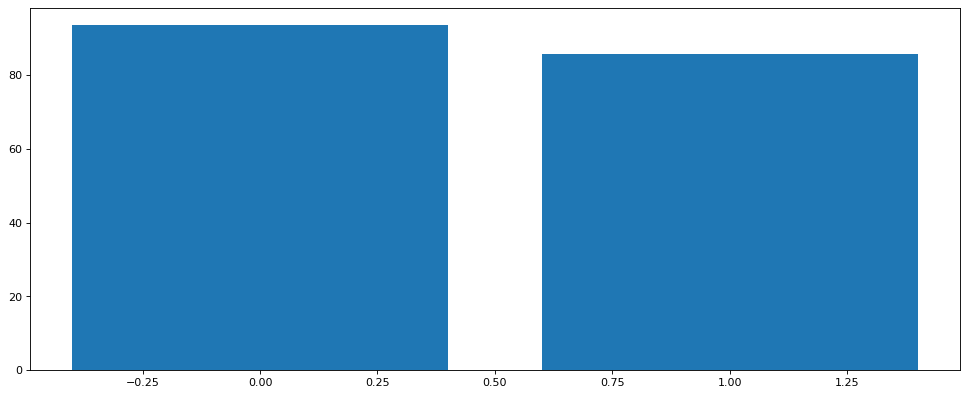

In [34]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(train_data.Churn,train_data.Age)
plt.show()

In [669]:
train_data['Totalyearinbank']=current_year-train_data.yearofEntry

train_data['Total_Age_month']=(current_month-train_data.monthofEntry)/12

train_data['Totalyearinbank']=train_data.Totalyearinbank+train_data.Total_Age_month

In [38]:
train_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,6.000000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667,4.000000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000,7.166667


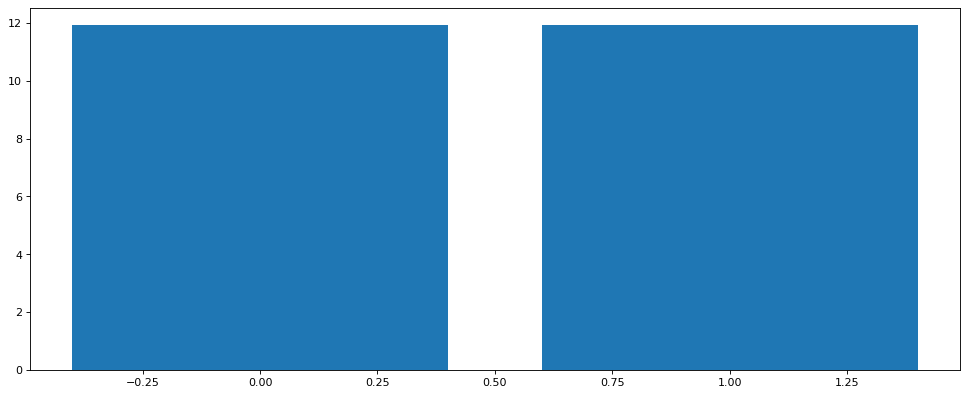

In [670]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(train_data.Churn,train_data.Totalyearinbank)
plt.show()

In [671]:
train_data.drop("yearofEntry",axis=1,inplace=True)
train_data.drop("monthofEntry",axis=1,inplace=True)
train_data.drop("dayofEntry",axis=1,inplace=True)
train_data.drop("Total_Age_month",axis=1,inplace=True)



In [40]:
train_data.nunique(axis=0)

Gender                     2
Location                   3
Education                  4
MaritalStatus              3
Occupation                 7
Ownhouse                   3
CreditScore              449
AccountBalance          4706
NumberOfProducts           4
IsCreditCardCustomer       2
ActiveMember               2
Salary                  7359
Churn                      2
Age                      676
Totalyearinbank          132
dtype: int64

In [43]:
train_data.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
Age                      float64
Totalyearinbank          float64
dtype: object

# convert variables in required data type

In [672]:
for col in ['Gender','Location','Education','MaritalStatus','Occupation','Ownhouse','IsCreditCardCustomer','ActiveMember','Churn']:
    train_data[col] = train_data[col].astype('category')

In [44]:
train_data.describe(include='all')

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
count,7360,7360,7360,7360,7360,7360,7360.000000,7360.000000,7360.000000,7360.0,7360.0,7360.000000,7360.0,7360.000000,7360.000000
unique,2,3,4,3,7,3,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN
top,Male,Location11,primary,single,admin.,no,NaN,NaN,NaN,1.0,1.0,NaN,0.0,NaN,NaN
freq,3994,3693,1864,2559,3207,3684,NaN,NaN,NaN,5183.0,3757.0,NaN,5868.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,650.648777,76601.068011,1.524592,NaN,NaN,99967.894062,NaN,40.396094,6.475453
std,NaN,NaN,NaN,NaN,NaN,NaN,96.769231,62442.214871,0.577415,NaN,NaN,57342.390262,NaN,10.470181,2.915035
min,NaN,NaN,NaN,NaN,NaN,NaN,350.000000,0.000000,1.000000,NaN,NaN,11.580000,NaN,19.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,NaN,NaN,51361.780000,NaN,33.250000,3.979167
50%,NaN,NaN,NaN,NaN,NaN,NaN,652.000000,96913.725000,1.000000,NaN,NaN,99446.940000,NaN,38.833333,6.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,718.000000,127660.767500,2.000000,NaN,NaN,149068.075000,NaN,45.166667,9.000000


In [524]:
from sklearn.utils import resample   #to fix imbalance

In [615]:
train_data_resampled=train_data
data_majority = train_data[train_data['Churn']==0]
data_minority = train_data[train_data['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5868, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results

train_data_resampled = pd.concat([data_majority, data_minority_upsampled])
 
train_data_resampled['Churn'].value_counts()

1    5868
0    5868
Name: Churn, dtype: int64

# Visualisation

In [69]:
!pip install plotly

In [70]:
import matplotlib.pyplot as plt

import pandas as pd  #for dataframe operations-
import numpy as np  #for numpy array
import seaborn as sns  #plotting

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

%matplotlib notebook

In [71]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\91989\anaconda3\lib\site-packages (4.4.1)


In [4]:
plotly.__version__

'4.4.1'

In [72]:
init_notebook_mode(connected=True)

In [73]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [74]:
def plot_bar(col_name):
    # create a table with value counts
    temp = train_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

In [64]:
train_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,6.000000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667,4.000000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000,7.166667


In [67]:
train_data.Gender.value_counts()

Male      3994
Female    3366
Name: Gender, dtype: int64

In [75]:
plot_bar('Gender')

In [77]:
plot_bar('Location')

In [78]:
plot_bar('Education')

In [79]:
plot_bar('MaritalStatus')

In [80]:
plot_bar('Occupation')

In [81]:
plot_bar('Ownhouse')

In [82]:
train_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,6.000000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667,4.000000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000,7.166667


In [84]:
plot_bar('NumberOfProducts')

In [85]:
plot_bar('IsCreditCardCustomer')

In [86]:
plot_bar('ActiveMember')

In [527]:
plot_bar('Churn')   #class imbalance

In [530]:
train_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716.0,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568.0,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739.0,89750.21,1,1,0,193008.52,0,20.083333,6.000000
4,Male,Location13,tertiary,single,management,no,670.0,0.00,2,1,1,78358.94,0,26.500000,7.166667
5,Male,Location11,unknown,divorced,self-employed,no,663.0,83195.12,1,1,1,48682.10,0,46.916667,6.166667


In [93]:
data = [go.Scatter(x=train_data.CreditScore,
                   y=train_data.AccountBalance,
                   
                   marker = dict(color = 'rgba(17, 157, 255, 0.6)', size = 10),
                   
                   mode = 'markers')]

layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

In [96]:
data = [go.Scatter(x=train_data.CreditScore,
                   y=train_data.Age,
                   
                   marker = dict(color = 'rgba(17, 157, 255, 0.6)', size = 10),
                   
                   mode = 'markers')]

layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

In [97]:
train_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,6.000000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667,4.000000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000,7.166667


In [100]:
data = [go.Scatter(x=train_data.Age,      # 30 to 50 have higheer salary
                   y=train_data.Salary,
                   
                   marker = dict(color = 'rgba(17, 157, 255, 0.6)', size = 10),
                   
                   mode = 'markers')]

layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

# check relation between target other variables

In [105]:
temp = train_data.groupby(['Gender','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Gender','Churn','Count']
temp

,Gender,Churn,Count
0,Female,0,2546
1,Female,1,820
2,Male,0,3322
3,Male,1,672


In [106]:
train_data.Gender.value_counts()

Male      3994
Female    3366
Name: Gender, dtype: int64

In [119]:
temp = train_data.groupby(['Location','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Location','Churn','Count']
temp

,Location,Churn,Count
0,Location11,0,3124
1,Location11,1,569
2,Location12,0,1231
3,Location12,1,603
4,Location13,0,1513
5,Location13,1,320


In [118]:
train_data.head(1)

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.0,2,1,0,189678.7,0,39.583333,5.083333


In [120]:
temp = train_data.groupby(['Education','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Education','Churn','Count']
temp

,Education,Churn,Count
0,primary,0,1501
1,primary,1,363
2,secondary,0,1437
3,secondary,1,402
4,tertiary,0,1446
5,tertiary,1,351
6,unknown,0,1484
7,unknown,1,376


In [121]:
temp = train_data.groupby(['MaritalStatus','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['MaritalStatus','Churn','Count']
temp

,MaritalStatus,Churn,Count
0,divorced,0,1819
1,divorced,1,479
2,married,0,2024
3,married,1,479
4,single,0,2025
5,single,1,534


In [122]:
temp = train_data.groupby(['Occupation','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Occupation','Churn','Count']
temp

,Occupation,Churn,Count
0,admin.,0,2430
1,admin.,1,777
2,management,0,625
3,management,1,124
4,retired,0,260
5,retired,1,83
6,self-employed,0,624
7,self-employed,1,124
8,services,0,631
9,services,1,131


In [123]:
temp = train_data.groupby(['Ownhouse','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['Ownhouse','Churn','Count']
temp

,Ownhouse,Churn,Count
0,no,0,2939
1,no,1,745
2,unknown,0,181
3,unknown,1,10
4,yes,0,2748
5,yes,1,737


In [124]:
temp = train_data.groupby(['NumberOfProducts','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['NumberOfProducts','Churn','Count']
temp

,NumberOfProducts,Churn,Count
0,1,0,2725
1,1,1,1043
2,2,0,3110
3,2,1,253
4,3,0,33
5,3,1,156
6,4,1,40


In [125]:
temp = train_data.groupby(['IsCreditCardCustomer','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['IsCreditCardCustomer','Churn','Count']
temp

,IsCreditCardCustomer,Churn,Count
0,0,0,1706
1,0,1,471
2,1,0,4162
3,1,1,1021


In [126]:
temp = train_data.groupby(['ActiveMember','Churn']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['ActiveMember','Churn','Count']
temp

,ActiveMember,Churn,Count
0,0,0,2658
1,0,1,945
2,1,0,3210
3,1,1,547


In [129]:
train_data.groupby('Churn').mean()

,CreditScore,AccountBalance,NumberOfProducts,Salary,Age,Totalyearinbank
Churn,,,,,,
0,651.671268,72853.893178,1.541241,99519.270781,38.918115,6.499347
1,646.627346,91338.616213,1.459115,101732.318606,46.208948,6.381479


# Handle Variables one by one-looking for classes, na values and whether we can put domain knowldge for feature selection

In [673]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [128]:
train_data.head(1)

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.0,2,1,0,189678.7,0,39.583333,5.083333


In [132]:
train_data.shape

(7360, 15)

In [133]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [130]:
train_data.Gender.value_counts()

Male      3994
Female    3366
Name: Gender, dtype: int64

In [131]:
train_data.Location.value_counts()

Location11    3693
Location12    1834
Location13    1833
Name: Location, dtype: int64

In [140]:
train_data.head(6)

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,6.000000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667,4.000000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000,7.166667
5,Male,Location11,unknown,divorced,self-employed,no,663,83195.12,1,1,1,48682.10,0,46.916667,6.166667


In [135]:
train_data.Ownhouse.value_counts() #it has unknown values

no         3684
yes        3485
unknown     191
Name: Ownhouse, dtype: int64

In [137]:
train_data.NumberOfProducts.value_counts()

1    3768
2    3363
3     189
4      40
Name: NumberOfProducts, dtype: int64

In [138]:
train_data.IsCreditCardCustomer.value_counts()

1    5183
0    2177
Name: IsCreditCardCustomer, dtype: int64

In [139]:
train_data.ActiveMember.value_counts()

1    3757
0    3603
Name: ActiveMember, dtype: int64

In [141]:
train_data.Occupation.value_counts()

admin.           3207
unknown           781
technician        770
services          762
management        749
self-employed     748
retired           343
Name: Occupation, dtype: int64

# multicollinearity and outliers

In [610]:
cat_attr=list(train_data.select_dtypes("category").columns)

In [589]:
num_attr=list(train_data.columns.difference(cat_attr))


In [590]:
num_attr

['AccountBalance',
 'Age',
 'CreditScore',
 'NumberOfProducts',
 'Salary',
 'Totalyearinbank']

In [591]:
cat_attr.remove("Churn")


In [592]:
train_data_new=train_data.sample(frac=0.7,random_state=200) #random state is a seed value
val_data=train_data.drop(train_data_new.index)


In [598]:
train_data.shape

(11042, 15)

In [597]:
train_data_new.shape

(7729, 15)

In [593]:
#Performing train val split on the data
X_train, y_train = train_data_new.loc[:,train_data_new.columns!='Churn'], train_data_new.loc[:,'Churn']

X_val, y_val = val_data.loc[:,val_data.columns!='Churn'], val_data.loc[:,'Churn']

# Multicollinearity

In [537]:
train_data.corr()   #no varialbe is highly correlated

,CreditScore,AccountBalance,NumberOfProducts,Salary,Age,Totalyearinbank
CreditScore,1.000000,0.022623,0.006308,-0.022031,0.005301,0.008447
AccountBalance,0.022623,1.000000,-0.170974,0.011640,0.051159,-0.003319
NumberOfProducts,0.006308,-0.170974,1.000000,-0.001265,-0.056919,0.007891
Salary,-0.022031,0.011640,-0.001265,1.000000,-0.012483,0.041134
Age,0.005301,0.051159,-0.056919,-0.012483,1.000000,-0.026648
Totalyearinbank,0.008447,-0.003319,0.007891,0.041134,-0.026648,1.000000


In [538]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data[num_attr].values, i) for i in range(train_data[num_attr].shape[1])]
vif["features"] = train_data[num_attr].columns

In [539]:
vif    #Fixed after standardisation

,VIF Factor,features
0,2.795005,AccountBalance
1,14.673317,Age
2,20.875138,CreditScore
3,5.837879,NumberOfProducts
4,3.917359,Salary
5,5.511295,Totalyearinbank


# Outliers

In [540]:
train_data.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore              float64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
Age                      float64
Totalyearinbank          float64
dtype: object

In [541]:
median = train_data['CreditScore'].median()
std = train_data['CreditScore'].std()
outliers = (train_data['CreditScore'] - median).abs() > 3*std


In [542]:
train_data.loc[outliers,'CreditScore'] = np.nan

In [204]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             7
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [205]:
train_data['CreditScore'].fillna(median, inplace=True)

In [206]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [207]:
median = train_data['AccountBalance'].median()
std = train_data['AccountBalance'].std()
outliers = (train_data['AccountBalance'] - median).abs() > 3*std


In [208]:
train_data.loc[outliers,'AccountBalance'] = np.nan

In [167]:
train_data.isnull().sum() #no outlier

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [168]:
median = train_data['Salary'].median()
std = train_data['Salary'].std()
outliers = (train_data['Salary'] - median).abs() > 3*std


In [169]:
train_data.loc[outliers,'Salary'] = np.nan

In [170]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [209]:
median = train_data['Age'].median()
std = train_data['Age'].std()
outliers = (train_data['Age'] - median).abs() > 3*std


In [210]:
train_data.loc[outliers,'Age'] = np.nan

In [211]:
train_data.isnull().sum()

Gender                    0
Location                  0
Education                 0
MaritalStatus             0
Occupation                0
Ownhouse                  0
CreditScore               0
AccountBalance            0
NumberOfProducts          0
IsCreditCardCustomer      0
ActiveMember              0
Salary                    0
Churn                     0
Age                     126
Totalyearinbank           0
dtype: int64

In [212]:
train_data['Age'].fillna(median, inplace=True)

In [213]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [214]:
median = train_data['Totalyearinbank'].median()
std = train_data['Totalyearinbank'].std()
outliers = (train_data['Totalyearinbank'] - median).abs() > 3*std


In [215]:
train_data.loc[outliers,'Totalyearinbank'] = np.nan

In [216]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

# Drop on Test data

In [641]:
test_data.drop("CustomerID",axis=1,inplace=True)
test_data.drop("CustomerName",axis=1,inplace=True)


# Feature Engineering on test Data

In [642]:
test_data['Age']=current_year-test_data.yearofBirth

In [643]:
test_data['Age_month']=(current_month-test_data.monthofBirth)/12

In [644]:
test_data['Age']=test_data.Age+test_data.Age_month

In [50]:
test_data.head()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Age_month
0,1972,5,5,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03,47.583333,0.583333
1,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38,29.000000,0.000000
2,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82,53.416667,0.416667
3,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97,36.416667,0.416667
4,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70,36.333333,0.333333


In [645]:
test_data.drop("yearofBirth",axis=1,inplace=True)
test_data.drop("monthofBirth",axis=1,inplace=True)
test_data.drop("dayofBirth",axis=1,inplace=True)
test_data.drop("Age_month",axis=1,inplace=True)



In [52]:
test_data.head()

,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age
0,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03,47.583333
1,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38,29.000000
2,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82,53.416667
3,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97,36.416667
4,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70,36.333333


In [646]:
test_data['Totalyearinbank']=current_year-test_data.yearofEntry

test_data['Total_Age_month']=(current_month-test_data.monthofEntry)/12

test_data['Totalyearinbank']=test_data.Totalyearinbank+test_data.Total_Age_month

In [54]:
train_data.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,Totalyearinbank
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,39.583333,5.083333
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,33.000000,8.333333
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0,20.083333,6.000000
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,50.666667,4.000000
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,26.500000,7.166667


In [647]:
test_data.drop("yearofEntry",axis=1,inplace=True)
test_data.drop("monthofEntry",axis=1,inplace=True)
test_data.drop("dayofEntry",axis=1,inplace=True)
test_data.drop("Total_Age_month",axis=1,inplace=True)



In [225]:
test_data.nunique(axis=0)

Gender                     2
Location                   3
Education                  4
MaritalStatus              3
Occupation                 7
Ownhouse                   3
CreditScore              403
AccountBalance          1153
NumberOfProducts           4
IsCreditCardCustomer       2
ActiveMember               2
Salary                  1840
Age                      524
Totalyearinbank          132
dtype: int64

In [648]:
for col in ['Gender','Location','Education','MaritalStatus','Occupation','Ownhouse','IsCreditCardCustomer','ActiveMember']:
    test_data[col] = test_data[col].astype('category')

In [227]:
test_data.describe(include='all')

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Totalyearinbank
count,1840,1840,1840,1840,1840,1840,1840.000000,1840.000000,1840.000000,1840.0,1840.0,1840.000000,1840.000000,1840.000000
unique,2,3,4,3,7,3,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
top,Male,Location11,unknown,single,admin.,no,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
freq,992,910,481,684,805,944,NaN,NaN,NaN,1302.0,978.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,650.783152,75116.590674,1.554348,NaN,NaN,100166.398853,40.384964,6.391214
std,NaN,NaN,NaN,NaN,NaN,NaN,96.329207,62614.929825,0.602950,NaN,NaN,58071.421408,10.739653,2.887505
min,NaN,NaN,NaN,NaN,NaN,NaN,363.000000,0.000000,1.000000,NaN,NaN,106.670000,19.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,NaN,NaN,50050.127500,33.250000,3.916667
50%,NaN,NaN,NaN,NaN,NaN,NaN,651.000000,97372.095000,2.000000,NaN,NaN,100766.915000,38.500000,6.333333
75%,NaN,NaN,NaN,NaN,NaN,NaN,718.000000,127735.702500,2.000000,NaN,NaN,149760.675000,45.770833,8.833333


# Outliers on test data

In [228]:
test_data.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Age                      float64
Totalyearinbank          float64
dtype: object

In [229]:
median = test_data['CreditScore'].median()
std = test_data['CreditScore'].std()
outliers = (test_data['CreditScore'] - median).abs() > 3*std


In [230]:
test_data.loc[outliers,'CreditScore'] = np.nan

In [231]:
test_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Age                     0
Totalyearinbank         0
dtype: int64

In [232]:
median = test_data['AccountBalance'].median()
std = test_data['AccountBalance'].std()
outliers = (test_data['AccountBalance'] - median).abs() > 3*std


In [233]:
test_data.loc[outliers,'AccountBalance'] = np.nan

In [234]:
test_data.isnull().sum() #no outlier

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Age                     0
Totalyearinbank         0
dtype: int64

In [235]:
median = test_data['Salary'].median()
std = test_data['Salary'].std()
outliers = (test_data['Salary'] - median).abs() > 3*std


In [236]:
test_data.loc[outliers,'Salary'] = np.nan

In [237]:
test_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Age                     0
Totalyearinbank         0
dtype: int64

In [238]:
median = test_data['Age'].median()
std = test_data['Age'].std()
outliers = (test_data['Age'] - median).abs() > 3*std


In [239]:
test_data.loc[outliers,'Age'] = np.nan

In [240]:
test_data.isnull().sum()

Gender                   0
Location                 0
Education                0
MaritalStatus            0
Occupation               0
Ownhouse                 0
CreditScore              0
AccountBalance           0
NumberOfProducts         0
IsCreditCardCustomer     0
ActiveMember             0
Salary                   0
Age                     27
Totalyearinbank          0
dtype: int64

In [241]:
test_data['Age'].fillna(median, inplace=True)

In [242]:
train_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
Totalyearinbank         0
dtype: int64

In [243]:
median = test_data['Totalyearinbank'].median()
std = test_data['Totalyearinbank'].std()
outliers = (test_data['Totalyearinbank'] - median).abs() > 3*std


In [244]:
test_data.loc[outliers,'Totalyearinbank'] = np.nan

In [245]:
test_data.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Age                     0
Totalyearinbank         0
dtype: int64

# Intiate Pipeline

In [649]:
#### TYPE
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent',fill_value='missing_value')),('onehot',OneHotEncoder(handle_unknown='ignore'))])


preprocessor=ColumnTransformer(
    
transformers=[('num',numeric_transformer,num_attr),('cat',categorical_transformer,cat_attr)])

# Getting preprocessed data from pipeline

In [249]:
preprocess_train=Pipeline(steps=[('preprocessor',preprocessor)])

In [250]:
#### TYPE
preprocessed_data_train=preprocess_train.fit_transform(X_train)

In [251]:
preprocessed_data_train=pd.DataFrame(preprocessed_data_train)
preprocessed_data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.471697,-0.601367,1.611646,0.835642,-1.158639,-0.710537,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.516179,0.942734,-1.058581,-0.903142,0.476201,1.289526,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.190410,0.135050,-1.037801,-0.903142,1.164487,0.946658,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-1.222419,-0.625122,-0.902731,0.835642,-1.396135,0.432356,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.127783,-1.480317,1.518137,0.835642,0.448683,-0.739109,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [254]:
X_train.dtypes  #to give column name, we need to check numerical and categorical columns name thru below commands

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Age                      float64
Totalyearinbank          float64
dtype: object

In [274]:
X_train.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Totalyearinbank
904,Female,Location12,primary,divorced,admin.,no,805,105663.56,2,0,1,33330.89,34.00,4.416667
2802,Male,Location12,tertiary,single,management,no,548,108437.89,1,0,0,127022.87,50.25,10.250000
5230,Female,Location11,unknown,single,admin.,yes,550,150490.32,1,0,0,166468.21,41.75,9.250000
4166,Male,Location13,tertiary,married,management,yes,563,0.00,2,1,1,19720.08,33.75,7.750000
6571,Female,Location13,primary,married,admin.,unknown,796,146584.19,2,0,0,125445.80,24.75,4.333333


In [253]:
preprocess_train.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names()


array(['x0_Female', 'x0_Male', 'x1_Location11', 'x1_Location12',
       'x1_Location13', 'x2_primary', 'x2_secondary', 'x2_tertiary',
       'x2_unknown', 'x3_divorced', 'x3_married', 'x3_single',
       'x4_admin.', 'x4_management', 'x4_retired', 'x4_self-employed',
       'x4_services', 'x4_technician', 'x4_unknown', 'x5_no',
       'x5_unknown', 'x5_yes', 'x6_0', 'x6_1', 'x7_0', 'x7_1'],
      dtype=object)

In [256]:
preprocessed_data_train.columns=['CreditScore ','AccountBalance','NumberOfProducts', 'Salary', 'Age', 'Totalyearinbank','x0_Female', 'x0_Male', 'x1_Location11', 'x1_Location12',
       'x1_Location13', 'x2_primary', 'x2_secondary', 'x2_tertiary',
       'x2_unknown', 'x3_divorced', 'x3_married', 'x3_single',
       'x4_admin.', 'x4_management', 'x4_retired', 'x4_self-employed',
       'x4_services', 'x4_technician', 'x4_unknown', 'x5_no',
       'x5_unknown', 'x5_yes', 'x6_0', 'x6_1', 'x7_0', 'x7_1'] 

In [257]:
preprocessed_data_train.head()

,CreditScore,AccountBalance,NumberOfProducts,Salary,Age,Totalyearinbank,x0_Female,x0_Male,x1_Location11,x1_Location12,...,x4_services,x4_technician,x4_unknown,x5_no,x5_unknown,x5_yes,x6_0,x6_1,x7_0,x7_1
0,0.471697,-0.601367,1.611646,0.835642,-1.158639,-0.710537,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.516179,0.942734,-1.058581,-0.903142,0.476201,1.289526,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.190410,0.135050,-1.037801,-0.903142,1.164487,0.946658,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-1.222419,-0.625122,-0.902731,0.835642,-1.396135,0.432356,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.127783,-1.480317,1.518137,0.835642,0.448683,-0.739109,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Preprocessing val data from pipeline

In [258]:
preprocess_val=Pipeline(steps=[('preprocessor',preprocessor)])

In [259]:
#### TYPE
preprocessed_data_val=preprocess_val.fit_transform(X_val)

In [260]:
preprocessed_data_val=pd.DataFrame(preprocessed_data_val)
preprocessed_data_val.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.196761,-1.979760,0.883952,-0.921445,1.611265,-0.152495,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.092024,0.615441,0.107914,-0.921445,-0.903036,-0.095231,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.325427,-0.069627,-1.638172,0.795476,1.540994,0.878245,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.011195,0.623501,0.986063,0.795476,-0.471191,1.851720,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.056897,-1.431705,0.322346,-0.921445,-1.358678,0.906876,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [261]:
X_val.head()  #to give column name, we need to check numerical and categorical columns name thru below commands

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Age,Totalyearinbank
2,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,20.083333,6.000000
5,Male,Location11,unknown,divorced,self-employed,no,663,83195.12,1,1,1,48682.10,46.916667,6.166667
7,Female,Location12,secondary,divorced,admin.,no,492,57068.43,2,1,0,188974.81,39.833333,9.000000
17,Male,Location12,tertiary,married,unknown,yes,749,78136.36,2,1,1,73470.98,47.000000,11.833333
18,Male,Location13,secondary,single,self-employed,no,684,143582.89,1,1,1,22527.27,25.750000,9.083333


In [262]:
preprocess_val.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names()


array(['x0_Female', 'x0_Male', 'x1_Location11', 'x1_Location12',
       'x1_Location13', 'x2_primary', 'x2_secondary', 'x2_tertiary',
       'x2_unknown', 'x3_divorced', 'x3_married', 'x3_single',
       'x4_admin.', 'x4_management', 'x4_retired', 'x4_self-employed',
       'x4_services', 'x4_technician', 'x4_unknown', 'x5_no',
       'x5_unknown', 'x5_yes', 'x6_0', 'x6_1', 'x7_0', 'x7_1'],
      dtype=object)

In [263]:
preprocessed_data_val.columns=['CreditScore ','AccountBalance','NumberOfProducts', 'Salary', 'Age', 'Totalyearinbank','x0_Female', 'x0_Male', 'x1_Location11', 'x1_Location12',
       'x1_Location13', 'x2_primary', 'x2_secondary', 'x2_tertiary',
       'x2_unknown', 'x3_divorced', 'x3_married', 'x3_single',
       'x4_admin.', 'x4_management', 'x4_retired', 'x4_self-employed',
       'x4_services', 'x4_technician', 'x4_unknown', 'x5_no',
       'x5_unknown', 'x5_yes', 'x6_0', 'x6_1', 'x7_0', 'x7_1'] 

In [264]:
preprocessed_data_val.head()

,CreditScore,AccountBalance,NumberOfProducts,Salary,Age,Totalyearinbank,x0_Female,x0_Male,x1_Location11,x1_Location12,...,x4_services,x4_technician,x4_unknown,x5_no,x5_unknown,x5_yes,x6_0,x6_1,x7_0,x7_1
0,0.196761,-1.979760,0.883952,-0.921445,1.611265,-0.152495,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.092024,0.615441,0.107914,-0.921445,-0.903036,-0.095231,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.325427,-0.069627,-1.638172,0.795476,1.540994,0.878245,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.011195,0.623501,0.986063,0.795476,-0.471191,1.851720,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.056897,-1.431705,0.322346,-0.921445,-1.358678,0.906876,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# check multicollinearity on standarised data

In [275]:
num_cols=preprocessed_data_train._get_numeric_data().columns 

In [543]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(preprocessed_data_train[num_cols].values, i) for i in range(preprocessed_data_train[num_cols].shape[1])]
vif["features"] = preprocessed_data_train[num_cols].columns

In [544]:
vif

,VIF Factor,features
0,1.347283,CreditScore
1,1.765283,AccountBalance
2,1.005132,NumberOfProducts
3,1.123469,Salary
4,1.003421,Age
5,1.004349,Totalyearinbank
6,inf,x0_Female
7,inf,x0_Male
8,inf,x1_Location11
9,inf,x1_Location12


# Model Building

In [545]:
#### TYPE
clf_logreg=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression())])

In [546]:
#### TYPE
clf_logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

# ROC AUC

In [547]:
train_pred_proba = clf_logreg.predict_proba(X_train)[:,1]
print("predict_probs are ")
train_pred_proba[1:10]

predict_probs are 


array([0.81640591, 0.08161347, 0.16220396, 0.21590231, 0.31202695,
       0.50265045, 0.77988027, 0.13551585, 0.63837134])

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [549]:
fpr, tpr, _ = metrics.roc_curve(y_train, train_pred_proba)

In [550]:
auc = metrics.roc_auc_score(y_train, train_pred_proba)
print("AUC =",auc)

AUC = 0.7837343023005342


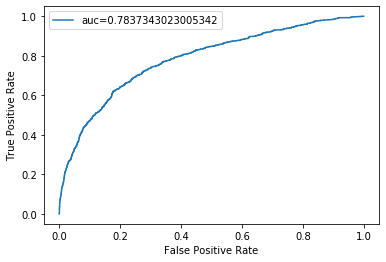

In [551]:
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [553]:
train_pred=clf_logreg.predict(X_train)
val_pred=clf_logreg.predict(X_val)

In [554]:
print(classification_report(y_train,train_pred))
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      4145
           1       0.71      0.68      0.69      3584

    accuracy                           0.72      7729
   macro avg       0.72      0.72      0.72      7729
weighted avg       0.72      0.72      0.72      7729

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1723
           1       0.22      0.73      0.33       159

    accuracy                           0.75      1882
   macro avg       0.59      0.74      0.59      1882
weighted avg       0.90      0.75      0.81      1882



# logistic on test

In [555]:
test_pred=clf_logreg.predict(test_data)

In [483]:
test_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [393]:
df = pd.DataFrame(test_pred)

In [484]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df_mith_log.csv')

# ridgeclassifiercv  --elasticnetcv doesnot work for classifcation


In [363]:
from sklearn.linear_model import RidgeClassifierCV

In [364]:
#### TYPE
ridge_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RidgeClassifierCV(fit_intercept=True, alphas=[
                       0.0125, 0.025, 0.05,.1, .125, .25, .5, 1., 2., 4.,10,100]))])

In [365]:
#### TYPE
ridge_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [366]:
ridge_model.named_steps["classifier"].alpha_

4.0

In [367]:
train_pred=ridge_model.predict(X_train)

In [368]:
val_pred=ridge_model.predict(X_val)

In [369]:
print(classification_report(y_train,train_pred))
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4109
           1       0.73      0.19      0.30      1043

    accuracy                           0.82      5152
   macro avg       0.78      0.59      0.60      5152
weighted avg       0.81      0.82      0.78      5152

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1759
           1       0.76      0.18      0.29       449

    accuracy                           0.82      2208
   macro avg       0.79      0.58      0.59      2208
weighted avg       0.81      0.82      0.77      2208



# lasso-cant use for classification, use logistic with l1 for lasso
The Lasso optimizes a least-square problem with a L1 penalty. By definition you can't optimize a logistic function with the Lasso.

If you want to optimize a logistic function with a L1 penalty, you can use the LogisticRegression estimator with the L1 penalty:

In [370]:
#### TYPE
clf_logreg=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(penalty='l1', solver='liblinear'))])

In [371]:
#### TYPE
clf_logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [372]:
train_pred=clf_logreg.predict(X_train)
val_pred=clf_logreg.predict(X_val)

In [373]:
print(classification_report(y_train,train_pred))
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4109
           1       0.68      0.28      0.40      1043

    accuracy                           0.83      5152
   macro avg       0.76      0.62      0.65      5152
weighted avg       0.81      0.83      0.80      5152

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1759
           1       0.71      0.27      0.39       449

    accuracy                           0.83      2208
   macro avg       0.77      0.62      0.65      2208
weighted avg       0.81      0.83      0.80      2208



# KNN

In [557]:
from sklearn.neighbors import KNeighborsClassifier

In [558]:
knn_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',KNeighborsClassifier(algorithm = 'brute',n_neighbors=5,metric="euclidean"))])

In [560]:
knn_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [561]:
train_pred=knn_model.predict(X_train)
val_pred=knn_model.predict(X_val)

In [562]:
from sklearn.metrics import classification_report

In [563]:
print(classification_report(y_train,train_pred))
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4145
           1       0.83      0.92      0.88      3584

    accuracy                           0.88      7729
   macro avg       0.88      0.88      0.88      7729
weighted avg       0.88      0.88      0.88      7729

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1723
           1       0.19      0.57      0.29       159

    accuracy                           0.76      1882
   macro avg       0.57      0.67      0.57      1882
weighted avg       0.89      0.76      0.81      1882



# Test

In [653]:
test_pred=knn_model.predict(test_data)

In [654]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df_mith_knn2.csv')

In [319]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [323]:
# Creating odd list of K for KNN
myList = list(range(1,50))

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, preprocessed_data_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores.mean())

In [247]:
cv_scores

[0.7506064162754303,
 0.8192879499217527,
 0.8039906103286384,
 0.8080399061032864,
 0.8179773082942097,
 0.8122652582159624,
 0.8164906103286386,
 0.8192488262910798,
 0.8080203442879499,
 0.816471048513302,
 0.8136932707355242,
 0.8221244131455399,
 0.8221439749608764,
 0.8263497652582158,
 0.8291471048513301,
 0.8221244131455399,
 0.8263302034428796,
 0.8235133020344287,
 0.8192292644757433,
 0.8206768388106417,
 0.8192879499217527,
 0.8178990610328638,
 0.8206768388106415,
 0.8248630672926447,
 0.8276799687010954,
 0.8262910798122066,
 0.8291079812206572,
 0.8304968701095461,
 0.8262910798122064,
 0.8276799687010954,
 0.8290884194053207,
 0.8207159624413144,
 0.8178990610328638,
 0.8165101721439749,
 0.8164906103286386,
 0.816471048513302,
 0.8136345852895148,
 0.8094483568075118,
 0.8192683881064162,
 0.810856807511737,
 0.8136541471048513,
 0.8094679186228481,
 0.8094483568075116,
 0.8052034428794992,
 0.8080399061032864,
 0.8052034428794992,
 0.8023865414710485,
 0.8066118935837

The optimal number of neighbors is 3


<IPython.core.display.Javascript object>


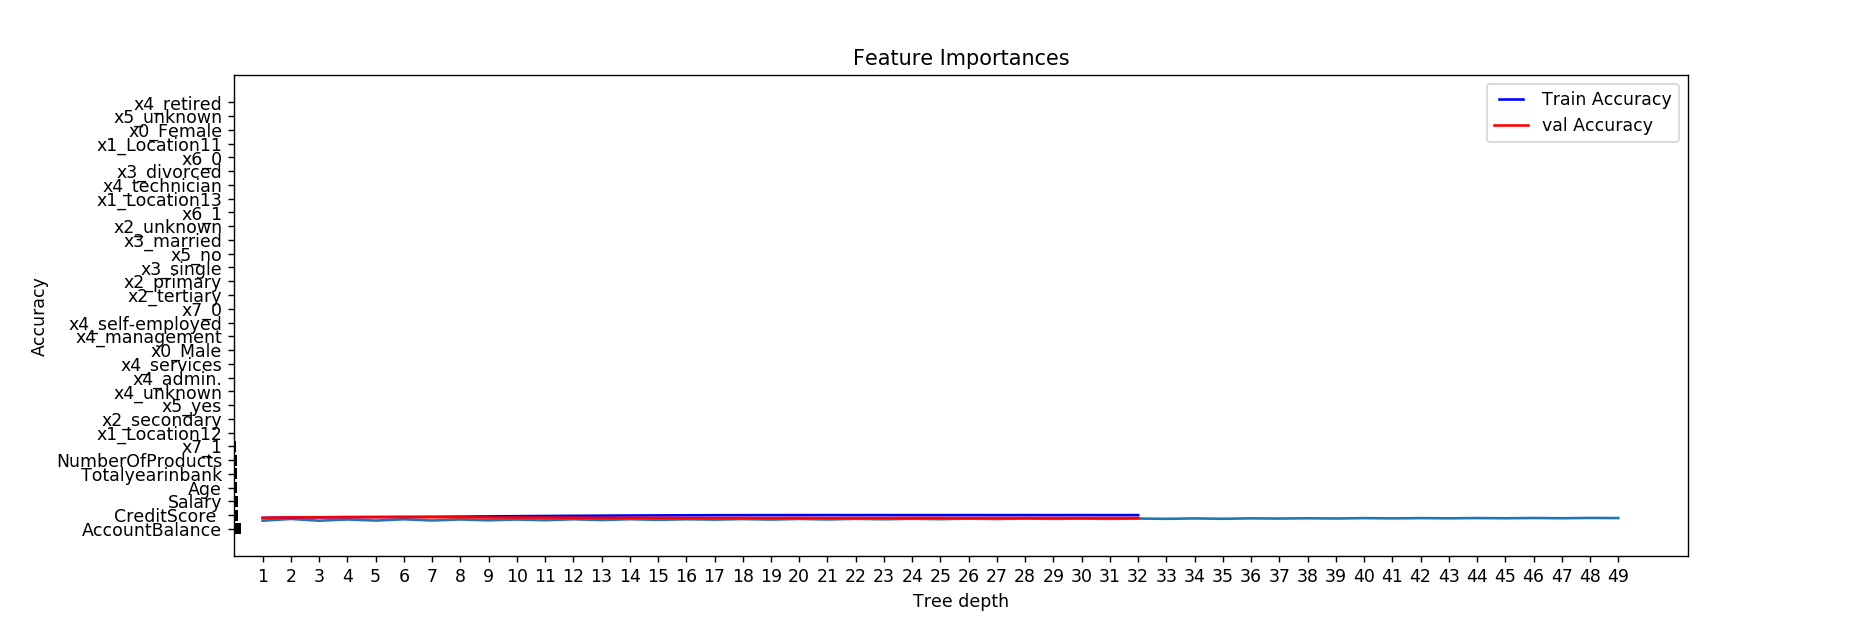

In [352]:
MCE = [ 1-x for x in cv_scores]

# Determining best k
optimal_k = myList[MCE.index(min(MCE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(myList, MCE)
plt.xticks(np.arange(1, 50, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Decision Tree

In [382]:
from sklearn import tree

In [565]:
decision_tree=Pipeline(steps=[('preprocessor',preprocessor),('classifier',tree.DecisionTreeClassifier())])

In [566]:
decision_tree.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [567]:
train_pred=decision_tree.predict(X_train)
val_pred=decision_tree.predict(X_val)

In [568]:
print(classification_report(y_train,train_pred))
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4145
           1       1.00      1.00      1.00      3584

    accuracy                           1.00      7729
   macro avg       1.00      1.00      1.00      7729
weighted avg       1.00      1.00      1.00      7729

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1723
           1       0.24      0.54      0.33       159

    accuracy                           0.82      1882
   macro avg       0.60      0.69      0.61      1882
weighted avg       0.89      0.82      0.85      1882



# DT on test data

In [569]:
test_pred=decision_tree.predict(test_data)


In [571]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\dmith_dt2.csv')

In [570]:
test_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

# Check important features

In [391]:
importances = decision_tree.steps[1][1].feature_importances_

In [393]:
features = preprocessed_data_train.columns
importances = decision_tree.steps[1][1].feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([preprocessed_data_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,AccountBalance,CreditScore,Salary,Age,Totalyearinbank,NumberOfProducts,x7_1,x1_Location12,x2_secondary,x5_yes,...,x2_unknown,x6_1,x1_Location13,x4_technician,x3_divorced,x6_0,x1_Location11,x0_Female,x5_unknown,x4_retired
1,0.250228,0.126673,0.112467,0.0979988,0.0911217,0.0766768,0.0501221,0.0215207,0.0167245,0.0120744,...,0.00706146,0.00704597,0.00698127,0.00643404,0.00537802,0.0049781,0.00197018,0.00196922,0,0


In [394]:
indices

array([ 1,  0,  3,  4,  5,  2, 31,  9, 12, 27, 24, 18, 22,  7, 19, 21, 30,
       13, 11, 17, 25, 16, 14, 29, 10, 23, 15, 28,  8,  6, 26, 20],
      dtype=int64)

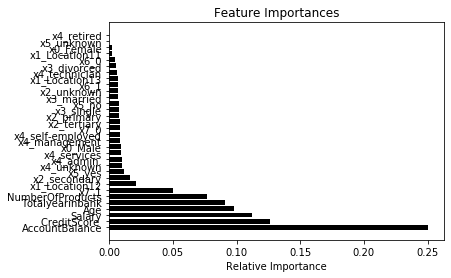

In [400]:
%matplotlib inline
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Max_depth

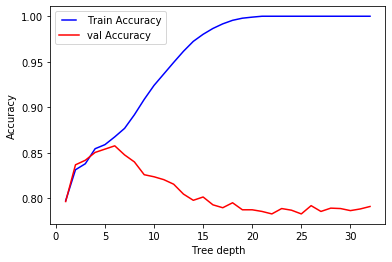

In [401]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(preprocessed_data_train, y_train)
    
    train_pred = dt.predict(preprocessed_data_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(preprocessed_data_val)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

# DT with imp features and optimized tree depth

In [493]:
decision_tree=Pipeline(steps=[('classifier',tree.DecisionTreeClassifier(max_depth=6))])

In [406]:
select = indices[0:7]
select

array([ 1,  0,  3,  4,  5,  2, 31], dtype=int64)

In [494]:
decision_tree.fit(preprocessed_data_train.iloc[:,select],y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [495]:
train_pred_dt=decision_tree.predict(preprocessed_data_train.iloc[:,select])
val_pred_dt=decision_tree.predict(preprocessed_data_val.iloc[:,select])

In [496]:
print(classification_report(y_train,train_pred_dt))
print(classification_report(y_val,val_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4109
           1       0.82      0.41      0.55      1043

    accuracy                           0.86      5152
   macro avg       0.85      0.69      0.73      5152
weighted avg       0.86      0.86      0.84      5152

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1759
           1       0.75      0.38      0.51       449

    accuracy                           0.85      2208
   macro avg       0.81      0.67      0.71      2208
weighted avg       0.84      0.85      0.83      2208



In [497]:
test_pred_dt=decision_tree.predict(preprocessed_data_train.iloc[:,select])

df = pd.DataFrame(test_pred_dt)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df_mith_dt.csv')

# SVM

In [433]:
%%time

svc_line=Pipeline(steps=[('preprocessor',preprocessor),('classifier',SVC())])
svc_line.set_params(classifier__kernel='linear',classifier__C=1,classifier__random_state=123)

svc_line.fit(X_train,y_train)

Wall time: 926 ms


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [434]:
train_pred_svc =svc_line.predict(X_train)
val_pred_svc = svc_line.predict(X_val)

In [435]:
print(classification_report(y_train,train_pred_svc))
print(classification_report(y_val,val_pred_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4109
           1       0.00      0.00      0.00      1043

    accuracy                           0.80      5152
   macro avg       0.40      0.50      0.44      5152
weighted avg       0.64      0.80      0.71      5152

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1759
           1       0.00      0.00      0.00       449

    accuracy                           0.80      2208
   macro avg       0.40      0.50      0.44      2208
weighted avg       0.63      0.80      0.71      2208



In [436]:
%%time

svc_line=Pipeline(steps=[('preprocessor',preprocessor),('classifier',SVC())])
svc_line.set_params(classifier__kernel='rbf',classifier__C=0.01,classifier__random_state=123)

svc_line.fit(X_train,y_train)

Wall time: 849 ms


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [437]:
train_pred_svc =svc_line.predict(X_train)
val_pred_svc = svc_line.predict(X_val)

In [439]:
print(classification_report(y_train,train_pred_svc))
print(classification_report(y_val,val_pred_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4109
           1       0.00      0.00      0.00      1043

    accuracy                           0.80      5152
   macro avg       0.40      0.50      0.44      5152
weighted avg       0.64      0.80      0.71      5152

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1759
           1       0.00      0.00      0.00       449

    accuracy                           0.80      2208
   macro avg       0.40      0.50      0.44      2208
weighted avg       0.63      0.80      0.71      2208



# SVM CV check SVM lab material

# Ensemble

In [421]:
!pip install xgboost

In [422]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [423]:
# Create adaboost-decision tree classifer object
Adaboost_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1))])


In [424]:
Adaboost_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [425]:
train_pred_Adaboost =Adaboost_model.predict(X_train)
val_pred_Adaboost = Adaboost_model.predict(X_val)

In [440]:
print(classification_report(y_train,train_pred_Adaboost))
print(classification_report(y_val,val_pred_Adaboost))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4109
           1       1.00      0.98      0.99      1043

    accuracy                           1.00      5152
   macro avg       1.00      0.99      0.99      5152
weighted avg       1.00      1.00      1.00      5152

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1759
           1       0.58      0.48      0.52       449

    accuracy                           0.82      2208
   macro avg       0.73      0.69      0.71      2208
weighted avg       0.81      0.82      0.82      2208



In [655]:
test_pred=Adaboost_model.predict(test_data)


df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\dmith_ada.csv')

# Grid

In [427]:
param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

#Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
 #           DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [451]:
# Create adaboost-decision tree classifer object
Adaboost_model_grid=Pipeline(steps=[('preprocessor',preprocessor),('classifier',GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1))])


In [452]:
Adaboost_model_grid.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [453]:
train_pred_Adaboost_grid =Adaboost_model_grid.predict(X_train)
val_pred_Adaboost_grid = Adaboost_model_grid.predict(X_val)

In [454]:
print(classification_report(y_train,train_pred_Adaboost_grid))
print(classification_report(y_val,val_pred_Adaboost_grid))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4109
           1       0.82      0.47      0.60      1043

    accuracy                           0.87      5152
   macro avg       0.85      0.72      0.76      5152
weighted avg       0.87      0.87      0.86      5152

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1759
           1       0.78      0.48      0.60       449

    accuracy                           0.87      2208
   macro avg       0.83      0.72      0.76      2208
weighted avg       0.86      0.87      0.85      2208



# prediction on test data

In [469]:
test_pred = Adaboost_model_grid.predict(test_data)


,0
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [470]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df_mith_ada.csv')

# Gradient Boosting

In [504]:
# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150],
           "max_depth" : [2, 10],
           "learning_rate" : [0.1,0.2]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)

In [505]:
# Create adaboost-decision tree classifer object
Adaboost_model_GBM_grid=Pipeline(steps=[('preprocessor',preprocessor),('classifier',CV_GBM )])


In [506]:
Adaboost_model_GBM_grid.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [507]:
val_pred_Adaboost_GBM_grid = Adaboost_model_GBM_grid.predict(X_val)

In [508]:
train_pred_Adaboost_GBM_grid = Adaboost_model_GBM_grid.predict(X_train)

In [509]:
print(classification_report(y_train,train_pred_Adaboost_GBM_grid))
print(classification_report(y_val,val_pred_Adaboost_GBM_grid))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4109
           1       0.81      0.49      0.61      1043

    accuracy                           0.87      5152
   macro avg       0.85      0.73      0.77      5152
weighted avg       0.87      0.87      0.86      5152

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1759
           1       0.76      0.48      0.59       449

    accuracy                           0.86      2208
   macro avg       0.82      0.72      0.75      2208
weighted avg       0.85      0.86      0.85      2208



In [659]:
df = pd.DataFrame(test_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\gbm.csv')

In [658]:
test_pred_Adaboost_GBM_grid =Adaboost_model_GBM_grid.predict(test_data)

In [284]:
df = pd.DataFrame(test_pred_Adaboost_GBM_grid_best)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df10.csv')

# XGB

In [510]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100],
     'max_depth': [10, 15]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [511]:
# Create adaboost-decision tree classifer object
Adaboost_model_XGB_grid=Pipeline(steps=[('preprocessor',preprocessor),('classifier',CV_XGB)])


In [512]:
Adaboost_model_XGB_grid.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [513]:
val_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(X_val)

In [514]:
train_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(X_train)

In [515]:
print(classification_report(y_train,train_pred_Adaboost_XGB_grid))
print(classification_report(y_val,val_pred_Adaboost_XGB_grid))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4109
           1       1.00      0.98      0.99      1043

    accuracy                           1.00      5152
   macro avg       1.00      0.99      0.99      5152
weighted avg       1.00      1.00      1.00      5152

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1759
           1       0.72      0.50      0.59       449

    accuracy                           0.86      2208
   macro avg       0.80      0.72      0.75      2208
weighted avg       0.85      0.86      0.85      2208



In [516]:
test_pred_Adaboost_XGB_grid = Adaboost_model_XGB_grid.predict(test_data)

In [517]:
df = pd.DataFrame(test_pred_Adaboost_XGB_grid)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\df_mith_xgb.csv')

# Stacking

In [450]:
data = pd.read_csv("book2.csv",header=0)

In [451]:
data.head()

,x1,x3,x5,x8,x6
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1


In [452]:
data.dtypes

x1    int64
x3    int64
x5    int64
x8    int64
x6    int64
dtype: object

In [453]:
for col in ['x1','x3','x5','x8','x6']:
    data[col] = data[col].astype('category')

In [454]:
#### TYPE
clf_logreg=LogisticRegression()

In [455]:
#### TYPE
clf_logreg.fit(data,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [456]:
data_test = pd.read_csv("teststacking.csv",header=0)

In [460]:
x=clf_logreg.predict(data_test)
x

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [459]:
df = pd.DataFrame(x)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\stacking.csv')

In [462]:
data_pred = pd.read_csv("book1.csv",header=0)

In [468]:
a=data_pred.mode(axis=1, numeric_only=False)
a.head()

,0
0,0
1,0
2,0
3,0
4,1


In [467]:
df = pd.DataFrame(a)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\stacking1.csv')

# Random Forest

In [460]:
from sklearn.ensemble import RandomForestClassifier

In [523]:
Randomforest_model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(n_estimators=20,max_depth=5))])

In [519]:
Randomforest_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [520]:
val_pred_rf = Randomforest_model.predict(X_val)

In [521]:
train_pred_rf = Randomforest_model.predict(X_train)

In [522]:
print(classification_report(y_train,train_pred_rf))
print(classification_report(y_val,val_pred_rf))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4109
           1       0.94      0.22      0.35      1043

    accuracy                           0.84      5152
   macro avg       0.89      0.61      0.63      5152
weighted avg       0.85      0.84      0.79      5152

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1759
           1       0.95      0.19      0.32       449

    accuracy                           0.83      2208
   macro avg       0.89      0.60      0.61      2208
weighted avg       0.85      0.83      0.79      2208



In [315]:
Randomforest_pred=Randomforest_model.predict(test_data)

In [530]:
df = pd.DataFrame(Randomforest_pred)
df.to_csv(r'C:\Users\91989\Documents\PYTHON\20191207_Batch75_CSE7305c_Lab02_KNN_Activity\random.csv')

# Check important features

In [319]:
importances = Randomforest_model.steps[1][1].feature_importances_

In [466]:
features = preprocessed_data_train.columns
importances = Randomforest_model.steps[1][1].feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([preprocessed_data_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,AccountBalance,Salary,CreditScore,Age,NumberOfProducts,x7_1,x7_0,Totalyearinbank,x1_Location12,x1_Location11,...,x3_divorced,x3_married,x4_management,x5_unknown,x5_yes,x2_primary,x4_self-employed,x4_services,x4_technician,x4_unknown
1,0.337,0.213031,0.057073,0.0538475,0.0473061,0.0444675,0.0439597,0.0393166,0.0353745,0.0194601,...,0.00415159,0.00382978,0.00355516,0.00352256,0.00307594,0.00271478,0.00175836,0.00158004,0.00127148,0.00124517


In [321]:
indices

array([0, 5, 6, 4, 1, 2, 9, 3, 8, 7], dtype=int64)

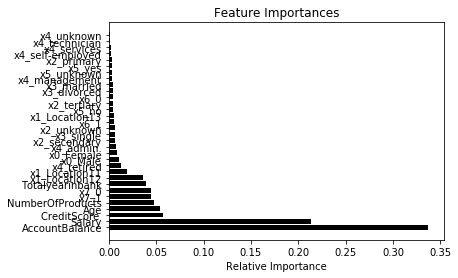

In [467]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Max_depth